In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,model_from_json,model_from_yaml,save_model
from tensorflow.keras.layers import Dropout,Dense,Conv2D,Flatten,MaxPool2D
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

In [3]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [4]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


In [5]:
model=Sequential()
 

In [6]:
model.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),padding='same',input_shape=[28,28,1]))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)))


model.add(Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(512,activation='relu'))


model.add(Dense(10,activation='softmax'))

In [7]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3

In [8]:
loss=keras.losses.CategoricalCrossentropy()
model.compile(loss=loss,optimizer='adam',metrics=['accuracy'])

In [9]:
history=model.fit(x_train,y_train,batch_size=300,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.1971 - accuracy: 0.9388 - val_loss: 0.0619 - val_accuracy: 0.9800
Epoch 2/10
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0316 - val_accuracy: 0.9882
Epoch 3/10
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0276 - val_accuracy: 0.9898
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/sample - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0250 - val_accuracy: 0.9918
Epoch 5/10
60000/60000 [==============================] - 142s 2ms/sample - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.0265 - val_accuracy: 0.9911
Epoch 6/10
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0335 - val_accuracy: 0.9908
Epoch 7/10
60000/60000 [==========================

<function matplotlib.pyplot.show(close=None, block=None)>

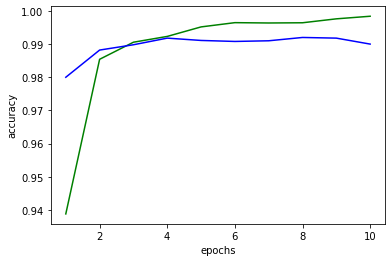

In [18]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(1,11)
plt.plot(epoch,train_acc,label='train_accuracy',c='g')
plt.plot(epoch,val_acc,label='validation_accuracy',c='b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show

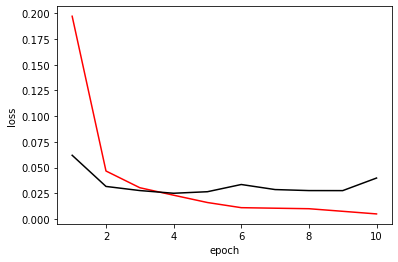

In [20]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epoch,train_loss,c='red')

plt.plot(epoch,val_loss,label='validation_loss',c='black')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [26]:

data="T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle boot"
labels=data.split(' ')
print(labels)
 

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle', 'boot']
